<center>
    <h1>CREDIT RISK ANALYTICS</h1>
</center>

**Credit risk analysis** is a form of analysis performed by a credit analyst to determine a borrower's ability to meet their debt obligations. The purpose of credit analysis is to determine the creditworthiness of borrowers by quantifying the risk of loss that the lender is exposed to. <br/><br/>
**Credit risk modeling** is a technique used by lenders to determine the level of credit risk associated with extending credit to a borrower. Credit risk analysis models can be based on either financial statement analysis, default probability, or machine learning. <br/><br/>
**Advantages of Credit Risk Management:**
*   Ability to measure and predict the risks of any single application.
*   Allows banks planning strategies ahead to avoid a negative outcome.
*   Using various credit scoring models, it's possible to figure out the best ones for the business and determine the level of risk while lending.




### Import Libraries & Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

In [2]:
#for machine learning

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data processing

In [3]:
#   Loading Dataset from github repo
#   which are collected non authorized party
#   its a demo project

data = "https://github.com/mdimran1/Dataset/blob/main/Bank%20Loan/bankloans.csv?raw=true"

bankloans = pd.read_csv(data)

In [4]:
bankloans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
bankloans.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [6]:
#number of observations and features
bankloans.shape

(850, 9)

In [7]:
#data types in the dataframe
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


<big>
- Checking for missing values

In [8]:
#check for number of missing values
bankloans.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [9]:
#Segregating the numeric and categorical variable names

numeric_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical_var_names = [key for key in dict(bankloans.dtypes) if dict(bankloans.dtypes)[key] in ['object']]


In [10]:
numeric_var_names

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

In [11]:
#splitting the data set into two sets - existing customers and new customers

bankloans_existing = bankloans.loc[bankloans.default.isnull() == 0]
bankloans_new = bankloans.loc[bankloans.default.isnull() == 1]

In [12]:
bankloans_existing.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


<big>
    - Checking for Outliers

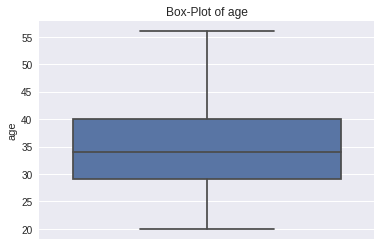

In [13]:
sns.boxplot(y = "age",data=bankloans_existing)
plt.title("Box-Plot of age")
plt.show()

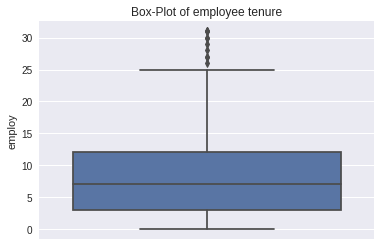

In [14]:
sns.boxplot(y = "employ",data=bankloans_existing)
plt.title("Box-Plot of employee tenure")
plt.show()

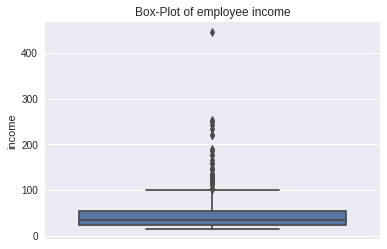

In [15]:
sns.boxplot(y = "income",data=bankloans_existing)
plt.title("Box-Plot of employee income")
plt.show()

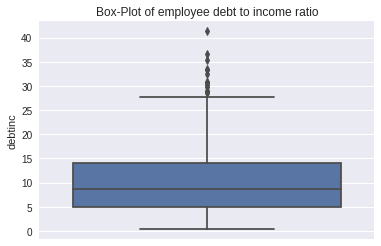

In [16]:
sns.boxplot(y = "debtinc",data=bankloans_existing)
plt.title("Box-Plot of employee debt to income ratio")
plt.show()

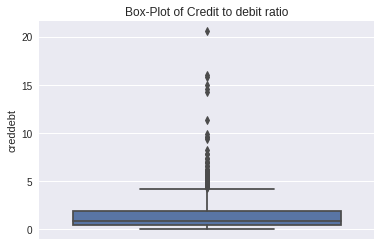

In [17]:
sns.boxplot(y = "creddebt",data=bankloans_existing)
plt.title("Box-Plot of Credit to debit ratio")
plt.show()

In [18]:
income_minlimit = bankloans_existing["income"].quantile(0.75) + 1.5 * (bankloans_existing["income"].quantile(0.75) - bankloans_existing["income"].quantile(0.25))
income_minlimit

101.5

In [19]:
# clip(upper=limit)

def outlier_capping(x):
    """A funtion to remove and replace the outliers for numerical columns"""
    x = x.clip(upper=income_minlimit)
    
    return(x)

In [20]:
#outlier treatment
bankloans_existing = bankloans_existing.apply(lambda x: outlier_capping(x))

In [21]:
##Correlation Matrix
bankloans_existing.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.560951,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.204394,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.725733,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.353754,0.011323,0.208435,0.226514,-0.164451
income,0.560951,0.204394,0.725733,0.353754,1.000000,-0.008606,0.514800,0.597798,-0.129385
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.008606,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.514800,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.597798,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.129385,0.389575,0.244740,0.145713,1.000000


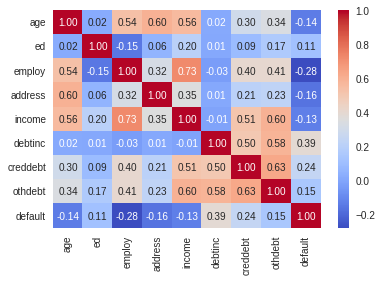

In [22]:
#Visualize the correlation using seaborn heatmap

sns.heatmap(bankloans_existing.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [23]:
bankloans_existing.shape

(700, 9)

In [24]:
bankloans_new.shape

(150, 9)

In [25]:
#Indicator variable unique types

bankloans_existing['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

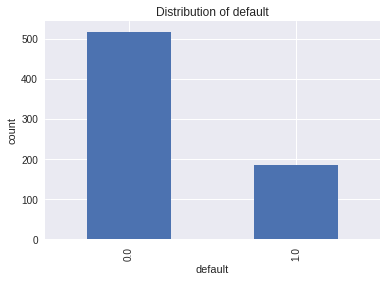

In [26]:
bankloans_existing['default'].value_counts().plot.bar()
plt.xlabel("default")
plt.ylabel("count")
plt.title("Distribution of default")
plt.show()

In [27]:
#percentage of unique types in indicator variable

round(bankloans_existing['default'].value_counts()/bankloans_existing.shape[0] * 100,3)

0.0    73.857
1.0    26.143
Name: default, dtype: float64

In [28]:
# Downloading csv file for further uses


bankloans_existing.to_csv('cleaned_existing.csv')
bankloans_new.to_csv("cleaned_new.csv")

## Data Exploratory Analysis
- Bivariate Analysis - Numeric(TTest)/ Categorical(Chisquare)
- Bivariate Analysis - Visualization
- Variable Reduction - Multicollinearity

In [29]:
## performing the independent t test on numerical variables

tstats_df = pd.DataFrame()

for eachvariable in numeric_var_names:
    tstats = stats.ttest_ind(bankloans_existing.loc[bankloans_existing["default"] == 1,eachvariable],bankloans_existing.loc[bankloans_existing["default"] == 0, eachvariable],equal_var=False)
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)

In [30]:
tstats_df

,Variable Name,T-Statistic,P-Value
0,default,inf,0.0
1,debtinc,9.536633,0.0
2,employ,-8.505217,0.0
3,address,-4.767369,0.000003
4,creddebt,4.770607,0.000003
5,income,-3.616894,0.000342
6,age,-3.50106,0.000535
7,othdebt,3.217296,0.001472
8,ed,2.945596,0.003475


### Bi-Variate Analysis

In [31]:
def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact of features on the target variable"""
    
    fig, ax = plt.subplots(ncols=1,figsize = (10,8))
    
    #boxplot
    sns.boxplot(x = 'default', y = segment_by, data=bankloans_existing)
    plt.title("Box plot of "+segment_by)
    
    
    plt.show()
    

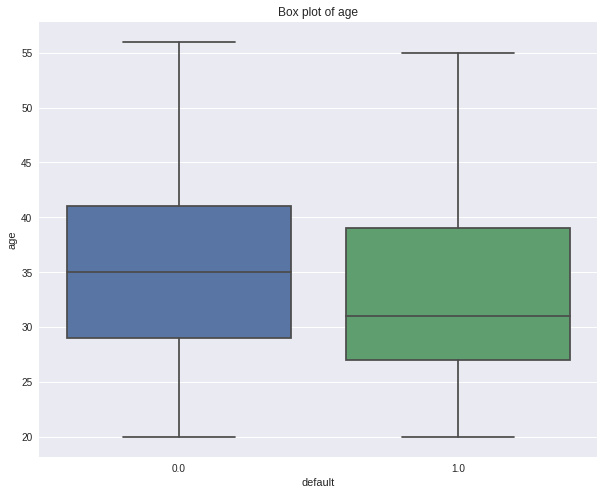

In [32]:
BivariateAnalysisPlot("age")

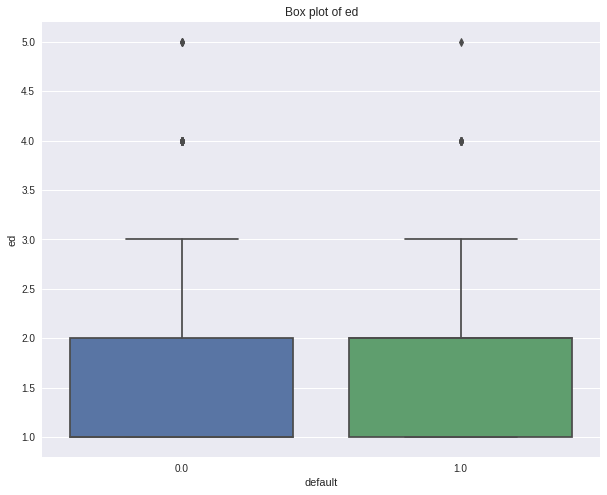

In [33]:
BivariateAnalysisPlot("ed")

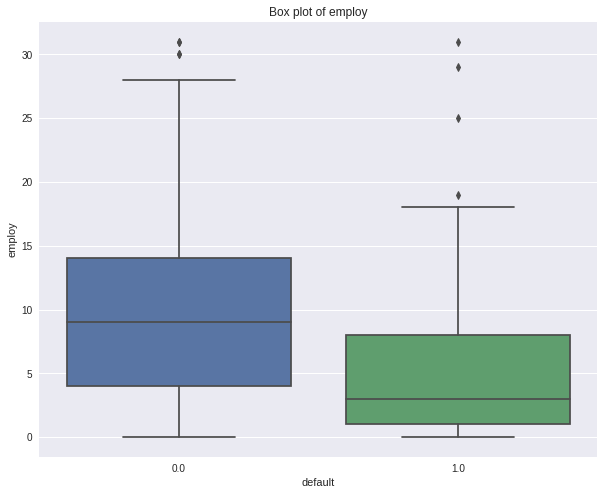

In [34]:
BivariateAnalysisPlot("employ")

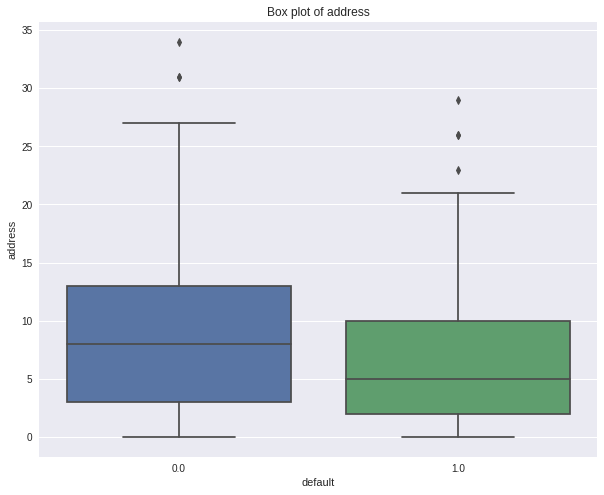

In [35]:
BivariateAnalysisPlot("address")

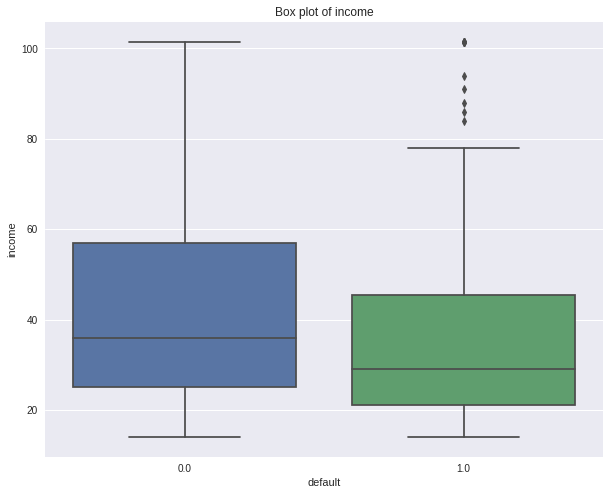

In [36]:
BivariateAnalysisPlot("income")

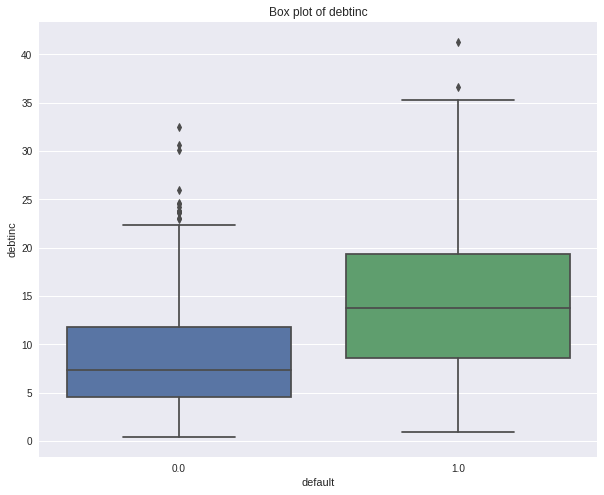

In [37]:
BivariateAnalysisPlot("debtinc")

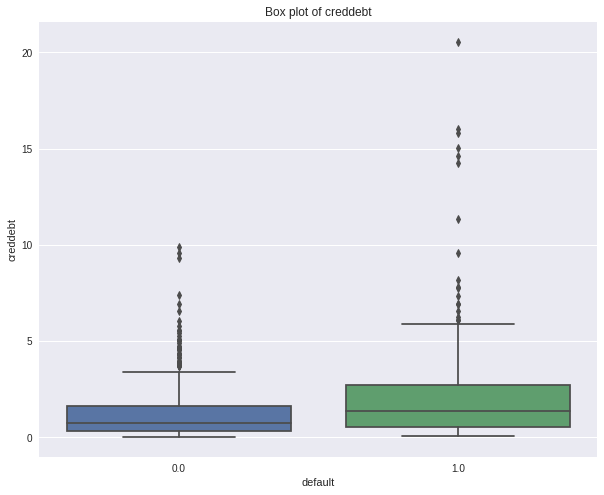

In [38]:
BivariateAnalysisPlot("creddebt")

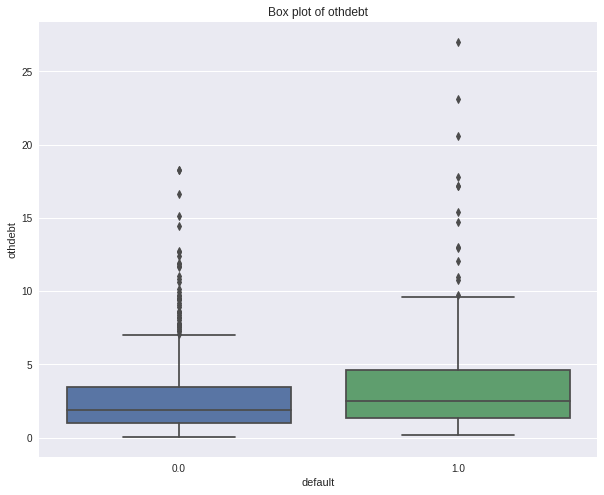

In [39]:
BivariateAnalysisPlot("othdebt")

### Multi Collinearity Check

In [40]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
features = "+".join(bankloans_existing.columns.difference(["default"]))

In [42]:
features

'address+age+creddebt+debtinc+ed+employ+income+othdebt'

In [43]:
#perform vif

a, b = dmatrices(formula_like= 'default ~ ' + features,data=bankloans_existing,return_type="dataframe")
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["Features"] = b.columns

In [44]:
vif

,VIF Factor,Features
0,34.684051,Intercept
1,1.563645,address
2,2.083355,age
3,2.122552,creddebt
4,2.628029,debtinc
5,1.313868,ed
6,2.779098,employ
7,4.478605,income
8,3.432541,othdebt


### Observations
----
<big>
- There are 850 observations and 9 features in the data set
- All 9 features are numerical in nature
- There are no missing values in the data set
- Out of 850 customers data, 700 are existing customers and 150 are new customers
- In the 700 existing customers, 517 customers are tagged as non defaulters and remaining 183 are tagged as defaulters
- The data is highly imbalanced
- From VIF check, found out that the correlation between the variables is within the acceptable limits

## Model Building and Model Diagnostics

   - Logistic Regression
   - Decision Tree classifier
---
**Model Diagnostics**

- Train and Test split
- Significance of each Variable
- Gini and ROC / Concordance analysis
- Classification Table Analysis - Accuracy

### Logistic Regression

In [45]:
featurecolumns = bankloans_existing.columns.difference(['default'])
featurecolumns

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [46]:
#Train and test split

train_X,test_X,train_y,test_y = train_test_split(bankloans_existing[featurecolumns],
                                                 bankloans_existing['default'], stratify = bankloans_existing['default'], test_size = 0.2, random_state = 123)

In [47]:
train_X.shape

(560, 8)

In [48]:
test_X.shape

(140, 8)

In [49]:
round(train_y.value_counts()/train_y.shape[0] * 100,3)

0.0    73.929
1.0    26.071
Name: default, dtype: float64

In [50]:
## Model Building

logreg = LogisticRegression()
logreg.fit(train_X,train_y)

LogisticRegression()

In [51]:
#Features and their coefficients

coefficient_df =  pd.DataFrame({'Features' : pd.Series(featurecolumns),
                        "Coefficients" : pd.Series(logreg.coef_[0])})
coefficient_df

,Features,Coefficients
0,address,-0.122178
1,age,0.036493
2,creddebt,0.541417
3,debtinc,0.087772
4,ed,0.148615
5,employ,-0.235696
6,income,-0.001659
7,othdebt,-0.011761


In [52]:
logreg.intercept_

array([-1.88174458])

### Model Performance 
- Test data set

#### Metrics

- Recall: Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized
- Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive

In [53]:
#Predicting the test cases
bankloans_test_pred_log = pd.DataFrame({'actual':test_y, 'predicted': logreg.predict(test_X)})
bankloans_test_pred_log = bankloans_test_pred_log.reset_index()
bankloans_test_pred_log.head()

,index,actual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0


In [54]:
#creating a confusion matrix

cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.predicted,labels = [1,0])
cm_logreg

array([[19, 18],
       [10, 93]])

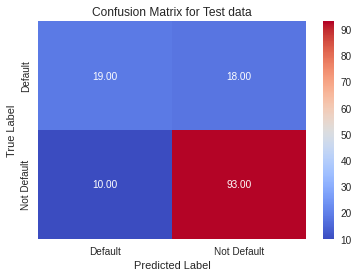

In [55]:
sns.heatmap(cm_logreg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [56]:
#find precision score

prec_score = metrics.precision_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted)
print("Precision score :", round(prec_score,3))

Precision score : 0.655


In [57]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.8


In [58]:
bankloans_test_pred_log.actual.value_counts()

0.0    103
1.0     37
Name: actual, dtype: int64

In [59]:
print(metrics.classification_report(bankloans_test_pred_log.actual, bankloans_test_pred_log.predicted))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       103
         1.0       0.66      0.51      0.58        37

    accuracy                           0.80       140
   macro avg       0.75      0.71      0.72       140
weighted avg       0.79      0.80      0.79       140



#### Inference
-----

<big>
Overall test accuracy is 80%. But it is not a good measure. There are lot of cases which are default and the model has predicted them as not default. The objective of the model is to identify the customers who will default, so that the bank can intervene and act.This might be the case as the default model assumes people with more than 0.5 probability will not default. 
</big>

### Find the optimum cutoff value

In [60]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(logreg.predict_proba(test_X))
predict_prob_df.head()

,0,1
0,0.766058,0.233942
1,0.952483,0.047517
2,0.692774,0.307226
3,0.092609,0.907391
4,0.698166,0.301834


In [61]:
bankloans_test_pred_log = pd.concat([bankloans_test_pred_log, predict_prob_df], axis = 1)
bankloans_test_pred_log.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1
0,145,0.0,0.0,0.766058,0.233942
1,526,0.0,0.0,0.952483,0.047517
2,689,0.0,0.0,0.692774,0.307226
3,430,1.0,1.0,0.092609,0.907391
4,245,0.0,0.0,0.698166,0.301834


In [62]:
#find the auc score

auc_score = metrics.roc_auc_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1)
round(auc_score,4)

0.8722

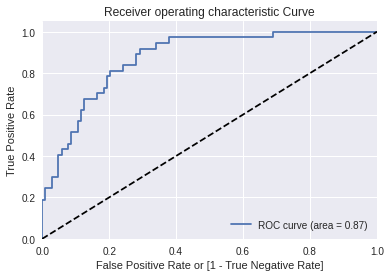

In [63]:
#Draw a roc curve

fpr, tpr, thresholds = metrics.roc_curve(bankloans_test_pred_log.actual, bankloans_test_pred_log.default_1, 
                                         drop_intermediate= False)


plt.plot(fpr, tpr , label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

<big>
- Cutoff would be optimum where specificity and sensitivity would be maximum for the given cutoff

In [64]:
##TPR - Sensitivity
##1-FPR - Specificity

i = np.arange(len(tpr))

roc_like_df = pd.DataFrame({'falsepositiverate' : pd.Series(fpr, index=i),'sensitivity' : pd.Series(tpr, index = i), 
              'specificity' : pd.Series(1-fpr, index = i),'cutoff' : pd.Series(thresholds, index = i)})
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [65]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,falsepositiverate,sensitivity,specificity,cutoff,total
64,0.291262,0.918919,0.708738,0.219946,1.627657


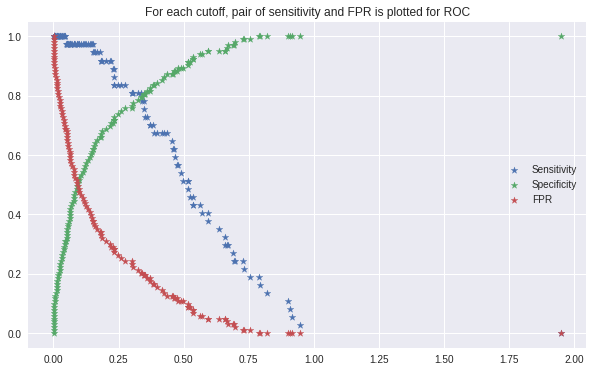

In [66]:
plt.subplots(figsize=(10,6))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['falsepositiverate'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

plt.show()

In [67]:
#Predicting with new cut-off probability
bankloans_test_pred_log['new_labels'] = bankloans_test_pred_log['default_1'].map( lambda x: 1 if x >= 0.224326 else 0 )

bankloans_test_pred_log.head()

,index,actual,predicted,default_0,default_1,new_labels
0,145,0.0,0.0,0.766058,0.233942,1
1,526,0.0,0.0,0.952483,0.047517,0
2,689,0.0,0.0,0.692774,0.307226,1
3,430,1.0,1.0,0.092609,0.907391,1
4,245,0.0,0.0,0.698166,0.301834,1


In [68]:
#creating a confusion matrix

cm_logreg = metrics.confusion_matrix(bankloans_test_pred_log.actual,
                                    bankloans_test_pred_log.new_labels,labels = [1,0])
cm_logreg

array([[33,  4],
       [30, 73]])

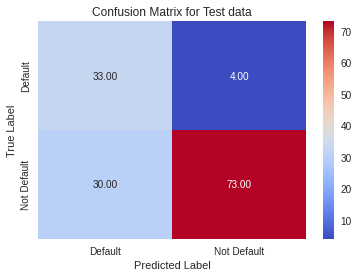

In [69]:
sns.heatmap(cm_logreg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [70]:
#classification report 

print(metrics.classification_report(bankloans_test_pred_log.actual,bankloans_test_pred_log.new_labels))

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       103
         1.0       0.52      0.89      0.66        37

    accuracy                           0.76       140
   macro avg       0.74      0.80      0.74       140
weighted avg       0.84      0.76      0.77       140



In [71]:
#intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(bankloans_test_pred_log.actual, bankloans_test_pred_log.new_labels)
print("recall_score:", round(recall_score , 3))

recall_score: 0.892


In [72]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_log.actual,bankloans_test_pred_log.new_labels)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.757


#### Inference
-----

<big>
Even though the overall accuracy of the model is reduced from 80% to 75% by taking optimum cutoff as 0.224, Model performance i.e recall score (ability of the model to find all the positive samples - find all the default customers) has increased from 54% to 89%. The drawback of changing the cutoff value can be seen in drastic drop of precision score (ability of model not to label non default customers as default customers) from 67% to 52%. 

</big>

- We have a choice to make depending on the value we place on the true positives and our tolerance for false postivies, in practical the cutoff values depends on the business decision values.

## Decision Tree Classifier

In [73]:
#make a pipeline for decision tree model

pipelines = {
    "dtclass": make_pipeline(DecisionTreeClassifier(random_state=100))
}


In [74]:
#To check the accuracy of the pipeline
scores = cross_validate(pipelines['dtclass'],train_X,train_y,return_train_score=True)
scores['test_score'].mean()

0.6982142857142858

#### Cross-Validation and Hyper Parameters Tuning
Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters
- Declare a hyper-parameters to fine tune the Decision Tree Classifier

**Decision Tree is a greedy alogritum it searches the entire space of possible decision trees. so we need to find a optimum parameter(s) or criteria for stopping the decision tree at some point. We use the hyperparameters to prune the decision tree**

In [75]:
#list of tunable hyper parameters for decision tree classifier pipeline

pipelines['dtclass'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [76]:
decisiontree_hyperparameters = {
    'decisiontreeclassifier__max_depth' : np.arange(3, 10),
    'decisiontreeclassifier__max_features' : np.arange(3, 8),
    'decisiontreeclassifier__min_samples_split' : np.arange(2, 15),
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

### Decision Tree classifier with gini index

#### Fit and tune models with cross-validation

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with cross-validation.
- We are doing 5 fold cross validation

In [77]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

dtclass_model = GridSearchCV(pipelines['dtclass'],decisiontree_hyperparameters,cv=5, n_jobs=-1)

In [78]:
#fit the model

dtclass_model.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [79]:
#display the best parameters for decision tree model

dtclass_model.best_params_

{'decisiontreeclassifier__max_depth': 7,
 'decisiontreeclassifier__max_features': 3,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 12}

In [80]:
#best score for the model
dtclass_model.best_score_

0.7875

In [81]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

dtclass_best_model = dtclass_model.best_estimator_.named_steps['decisiontreeclassifier']
dtclass_best_model

DecisionTreeClassifier(max_depth=7, max_features=3, min_samples_leaf=2,
                       min_samples_split=12, random_state=100)

### Model Performance Evaluation
- On Test Data

In [82]:
#Predicting the test cases
bankloans_test_pred_dtclass = pd.DataFrame({'actual':test_y, 'predicted': dtclass_best_model.predict(test_X)})
bankloans_test_pred_dtclass = bankloans_test_pred_dtclass.reset_index()
bankloans_test_pred_dtclass.head()

,index,actual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,1.0
3,430,1.0,1.0
4,245,0.0,0.0


In [83]:
#creating a confusion matrix

cm_dtclass = metrics.confusion_matrix(bankloans_test_pred_dtclass.actual,
                                    bankloans_test_pred_dtclass.predicted,labels = [1,0])
cm_dtclass

array([[16, 21],
       [10, 93]])

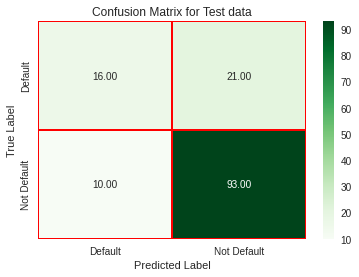

In [84]:
sns.heatmap(cm_dtclass,annot=True, fmt=".2f", cmap="Greens",linewidths=.5,linecolor="red",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [85]:
#probabilty of prediction

predict_prob_df = pd.DataFrame(dtclass_best_model.predict_proba(test_X))
predict_prob_df.head()

,0,1
0,1.000000,0.000000
1,0.981132,0.018868
2,0.375000,0.625000
3,0.375000,0.625000
4,1.000000,0.000000


In [86]:
bankloans_test_pred_dtclass = pd.concat([bankloans_test_pred_dtclass, predict_prob_df], axis = 1)
bankloans_test_pred_dtclass.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

bankloans_test_pred_dtclass.head()

,index,actual,predicted,default_0,default_1
0,145,0.0,0.0,1.000000,0.000000
1,526,0.0,0.0,0.981132,0.018868
2,689,0.0,1.0,0.375000,0.625000
3,430,1.0,1.0,0.375000,0.625000
4,245,0.0,0.0,1.000000,0.000000


In [87]:
#find the auc score

auc_score = metrics.roc_auc_score(bankloans_test_pred_dtclass.actual, bankloans_test_pred_dtclass.default_1)
round(auc_score,4)

0.715

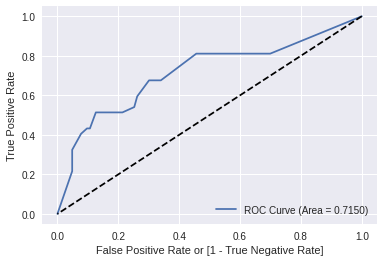

In [88]:
#plotting the roc curve

fpr, tpr, thresholds = metrics.roc_curve(bankloans_test_pred_dtclass.actual, bankloans_test_pred_dtclass.default_1,
                                         drop_intermediate=False)

plt.plot(fpr, tpr, label = "ROC Curve (Area = %0.4f)" % auc_score)
plt.plot([1,0],[1,0],'k--')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate or [1 - True Negative Rate]")

plt.legend(loc = "lower right")
plt.show()

In [89]:
#find precision score

prec_score = metrics.precision_score(bankloans_test_pred_dtclass.actual, bankloans_test_pred_dtclass.predicted)
print("Precision score :", round(prec_score,3))

Precision score : 0.615


In [90]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_pred_dtclass.actual,bankloans_test_pred_dtclass.predicted)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.779


In [91]:
#classification report

print(metrics.classification_report(bankloans_test_pred_dtclass.actual,bankloans_test_pred_dtclass.predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       103
         1.0       0.62      0.43      0.51        37

    accuracy                           0.78       140
   macro avg       0.72      0.67      0.68       140
weighted avg       0.76      0.78      0.76       140



### Visualization of Decision Tree
- Dependencies 
    - Need to install graphviz (conda install pydot graphviz)
    - Set the environment path variable to graphviz folder

In [92]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus as pdot

In [93]:
#writing the dot data
dot_data = StringIO()

In [94]:
#export the decision tree along with the feature names into a dot file format

export_graphviz(dtclass_best_model,out_file=dot_data,filled=True,special_characters=True,rounded=True,
                feature_names=train_X.columns.values,class_names = ["No","Yes"])

In [95]:
#make a graph from dot file

graph = pdot.graph_from_dot_data(dot_data.getvalue())

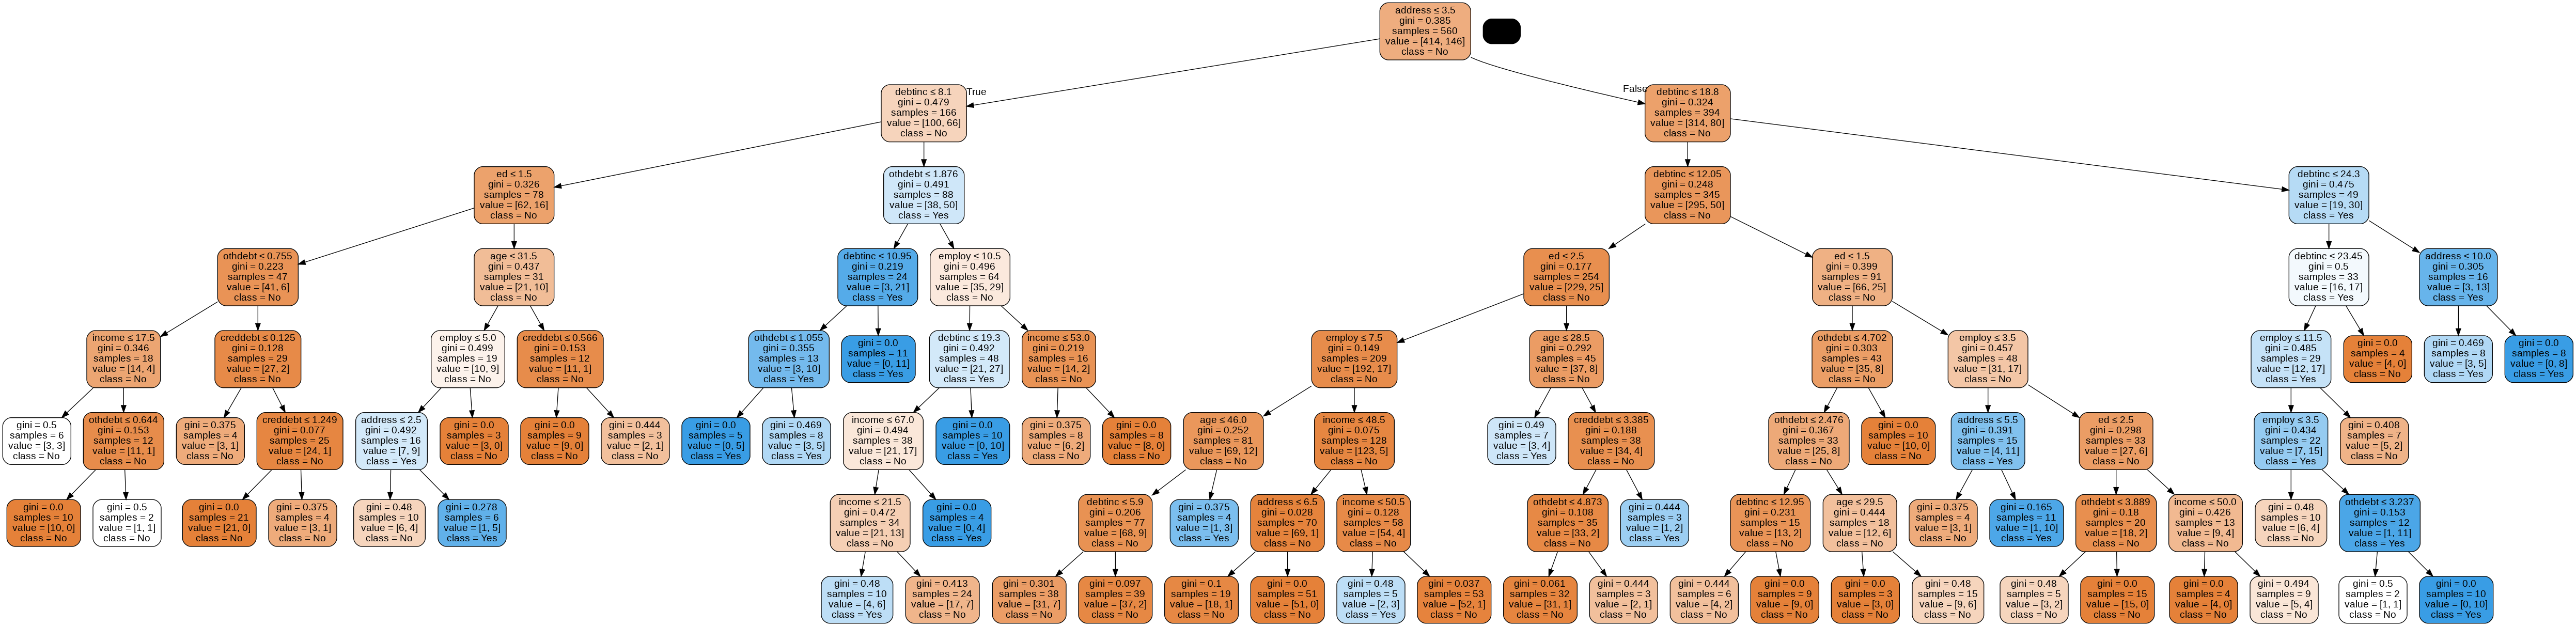

In [96]:
Image(graph.create_png())

## Model Selection and Business Insights
___
<big>
- Based on the F1-score (harmonic mean of precision and recall), logistic model with f1 score (for positive labels - default customers) of 0.66 is giving better results than decision tree model with f1 score of 0.44. So we will use the logistic regression model to predict the credit worthiness of the customers 
    
-We will Predict the credit risk for remainimg 150 customers using the logistic model with cutoff as 0.224 

In [97]:
#probability for new customers

new_cust_prob = pd.DataFrame(logreg.predict_proba(bankloans_new[featurecolumns]))
new_cust_prob.columns = ["prob_default_0", "prob_default_1"]
new_cust_prob.index = bankloans_new.index

In [98]:
new_cust_prob.head()

,prob_default_0,prob_default_1
700,0.990197,0.009803
701,0.944150,0.055850
702,0.359621,0.640379
703,0.922597,0.077403
704,0.626066,0.373934


In [99]:
bankloans_new_predicted = pd.concat([bankloans_new,new_cust_prob],axis=1)
bankloans_new_predicted.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob_default_0,prob_default_1
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.990197,0.009803
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.944150,0.055850
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.359621,0.640379
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.922597,0.077403
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.626066,0.373934


In [100]:
#using the cutoff value we will predict the default

bankloans_new_predicted['predicted_default'] = bankloans_new_predicted["prob_default_1"].apply(lambda x: 1 if x > 0.224 else 0)

In [101]:
bankloans_new_predicted.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob_default_0,prob_default_1,predicted_default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.990197,0.009803,0
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.944150,0.055850,0
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.359621,0.640379,1
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.922597,0.077403,0
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.626066,0.373934,1


In [102]:
#Model Prediction

bankloans_new_predicted.predicted_default.value_counts()

0    90
1    60
Name: predicted_default, dtype: int64

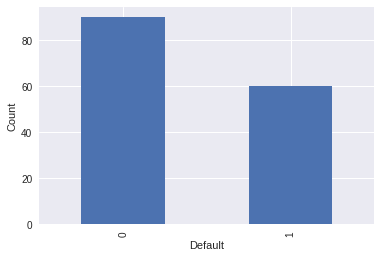

In [103]:
#Model Prediction

bankloans_new_predicted.predicted_default.value_counts().plot.bar()

plt.ylabel("Count")
plt.xlabel("Default")
plt.show()

## Insights
---

- Out of 150 new customers, model has predicted that 85 customers are not going to default on the bank loan and remaining 65 customes would most likely default on the loan.

### Model Performance Validation

- KS Chart
- Lift and Gain Chart

we will use the concept of decile analysis for these validations

In [104]:
#For train data

train_predict = pd.DataFrame({'actual': train_y.reset_index(drop = True), 
                              'prob':  pd.DataFrame(logreg.predict_proba(train_X))[1]})
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.224 else 0)
train_predict.head()

,actual,prob,predicted
0,0.0,0.280297,1
1,0.0,0.003919,0
2,0.0,0.039368,0
3,0.0,0.156811,0
4,1.0,0.121764,0


In [105]:
#For test data

test_predict = pd.DataFrame({'actual': test_y.reset_index(drop = True), 
                              'prob':  pd.DataFrame(logreg.predict_proba(test_X))[1]})
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.224 else 0)
test_predict.head()

,actual,prob,predicted
0,0.0,0.233942,1
1,0.0,0.047517,0
2,0.0,0.307226,1
3,1.0,0.907391,1
4,0.0,0.301834,1


<big>
    Split the data into different deciles - train and test data

In [106]:
#splitting the train data into different deciles

train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)
train_predict.head()

,actual,prob,predicted,Deciles
0,0.0,0.280297,1,6
1,0.0,0.003919,0,0
2,0.0,0.039368,0,2
3,0.0,0.156811,0,4
4,1.0,0.121764,0,4


In [107]:
#splitting the test data into different deciles

test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)
test_predict.head()

,actual,prob,predicted,Deciles
0,0.0,0.233942,1,5
1,0.0,0.047517,0,2
2,0.0,0.307226,1,6
3,1.0,0.907391,1,9
4,0.0,0.301834,1,6


In [108]:
#sumation of deciles for train data

train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)

,Deciles,actual
Deciles,,
9,504,46.0
8,448,33.0
7,392,20.0
6,336,18.0
5,280,14.0
4,224,3.0
3,168,7.0
2,112,1.0
1,56,4.0


In [109]:
#sumation of deciles for test data

test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)

,Deciles,actual
Deciles,,
9,126,11.0
8,112,8.0
7,98,6.0
6,84,6.0
5,70,4.0
4,56,1.0
3,42,0.0
2,28,1.0
1,14,0.0


In [110]:
train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)

,Deciles,actual
Deciles,,
9,56,56
8,56,56
7,56,56
6,56,56
5,56,56
4,56,56
3,56,56
2,56,56
1,56,56


In [111]:
test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)

,Deciles,actual
Deciles,,
9,14,14
8,14,14
7,14,14
6,14,14
5,14,14
4,14,14
3,14,14
2,14,14
1,14,14


In [112]:
from IPython.display import Image

### Observations
---
<big>
- Gain chart tells % of targets (events) covered at a given decile level. In the current case, we can say that we can identify 90% of the defaulters who are likely to default on the loan by just analyzing 50% of the total customers.
- Lift chart measures how much better one can expect to do with the predictive model comparing without a model. In the current model, cummulative lift for top two deciles is 2.7, means that by selecting 20% of the records based on the model. One can expect 2.7 times the total number of defaulters to be found than the randomly selecting 20% of the data without a model.

## Finally, let's save the winning model.
- We need to save your prediction models to file, and then restore them in order to reuse your previous work to: test your model on new data, compare multiple models, or anything else.


In [113]:
import pickle

Let's save the winning <code style="color:steelblue">Logistic Model</code> object into a pickle file.

In [117]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)